In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# suite-id
runid='ds042'

In [3]:
# species to plot
alice='ALICE'
bob='BOB'

In [4]:
# read-in the species ("tracer") concentrations
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/ukca/tracer_out.csv'

In [5]:
# read the header so know which species are in which column
f=open(datafile, 'r')
# read the first line, not needed here
slist=f.readline()
# need this line as contains the species names
slist=f.readline().split(',')
# remove all leading and trailing blanks
slist=[x.strip() for x in slist]
f.close()

In [6]:
# get index for 
aindex=slist.index(alice)
bindex=slist.index(bob)

In [7]:
# read in the data for plotting - comma separated so add delimiter
species=np.loadtxt(datafile, dtype=np.float64, delimiter=',')

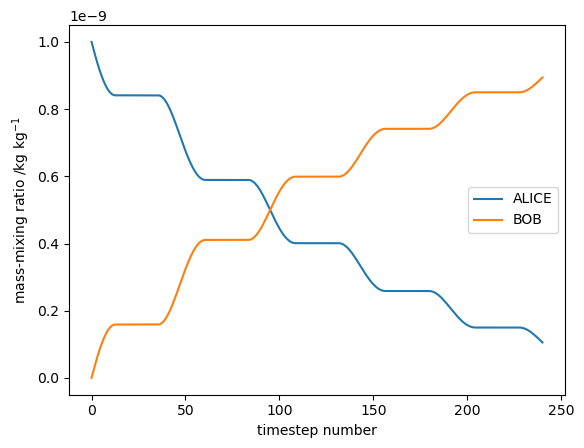

In [8]:
# plot the species of interest
plt.plot(species[:,0],species[:,aindex], label=alice)
plt.plot(species[:,0],species[:,bindex], label=bob)
plt.xlabel('timestep number')
plt.ylabel(r'mass-mixing ratio /kg kg$^{-1}$')
plt.legend()
plt.show()

In [9]:
# now read-in reaction fluxes
fluxfile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/ukca/flux_out.csv'

In [10]:
# read the header so know which species are in which column
f=open(fluxfile, 'r')
# read the first & second line, not needed here
flist=f.readline()
flist=f.readline()
# need this line as contains the species names and remove all leading and trailing blanks
# there are up to 2 reactants
flist=f.readline().split(',')
r1=[x.strip() for x in flist]
# copy this to get index later
abflist=r1.copy()
flist=f.readline().split(',')
r2=[x.strip() for x in flist]
flist=f.readline().split(',')
# and up to 4 products
p1=[x.strip() for x in flist]
flist=f.readline().split(',')
p2=[x.strip() for x in flist]
flist=f.readline().split(',')
p3=[x.strip() for x in flist]
flist=f.readline().split(',')
p4=[x.strip() for x in flist]
f.close()

In [11]:
# read in the fluxes for plotting - comma separated so add delimiter
fluxes=np.loadtxt(fluxfile, dtype=np.float64, delimiter=',')

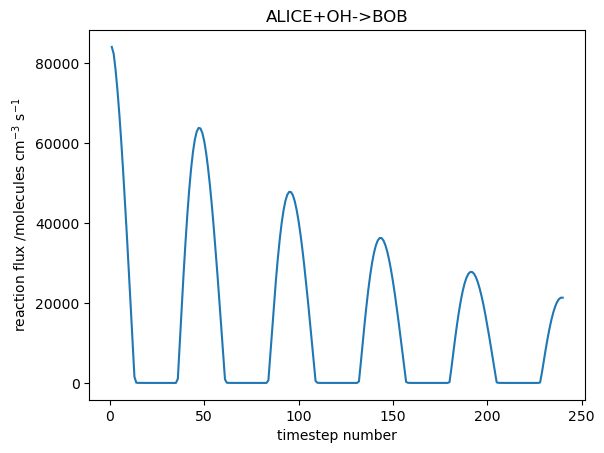

In [12]:
# plot the one of the fluxes
findex=abflist.index(alice)
plt.plot(fluxes[:,0],fluxes[:,findex])
ftitle=r1[findex]+' '+r2[findex]+'->'+p1[findex]+' '+p2[findex]+' '+p4[findex]+' '+p4[findex]
# sort out where the + symbols need to be, taking account of the possible 2nd reactant
plt.title(ftitle.strip().replace(' ->','->').replace(' ','+'))
plt.xlabel('timestep number')
plt.ylabel(r'reaction flux /molecules cm$^{-3}$ s$^{-1}$')
plt.show()